In [1]:
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import time

### 模擬網頁爬文

In [2]:
url = 'https://www.cupoy.com/newsfeed/topicgrp/life_tw'
browser = webdriver.Chrome(executable_path = 'chromedriver')
browser.get(url)

category_list = []
title_list = []
content_list = []
while (len(title_list) < 500):
    time.sleep(2)
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, 'html5lib')
    
    #存取每篇文章的(類型/標題/內容)
    for artical in soup.find_all(class_='sc-eEieub sc-iuDHTM ibJqYc'):
        category = artical.find(class_='sc-gacfCG bPSpUf').text
        title = artical.find('h6').text
        content = artical.find('p').text
        
        #確認不是重複的文章
        if title not in title_list:
            category_list.append(category)
            title_list.append(title)
            content_list.append(content)
            
    browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')

### 建立DataFrame

In [3]:
import pandas as pd

df = pd.DataFrame([category_list, title_list, content_list])
df = df.T
df.columns = (['類型', '標題', '內容'])
df

,類型,標題,內容
0,醫療健康,【孩子出生就沒眼鼻】汙染死亡率全球第 7！南蘇丹爆發環境危機，政府卻因「1 關鍵」無視畸形兒...,【我們為什麼挑選這篇文章】 石油是現階段全球使用最廣泛的原物料，也是工業社會中重要的動力燃料...
1,美妝保養,麥當勞推6合1漢堡香氛蠟燭，要你點燃牛肉香氣是想做什麼？｜數位時代,麥當勞近日創新推出漢堡口味的香氛蠟燭，究竟這間速食品牌不安份推出各種周邊商品，圖的究竟是什麼？
2,旅遊,旅遊YouTuber就是一直玩？專訪旅行YJ，她如何靠「開房間」走紅｜數位時代,旅行YJ是較為稀有，專攻「旅遊類型」的YouTuber，你對她也許有一樣的疑問：「旅遊You...
3,美食,豆腐冰、流沙餡雞蛋糕、無菜單米苔目...三峽老街這八家連在地人都在排隊的私房美食趕快收進口袋...,三峽是個好地方啊！平價小吃跟古早味美食連在地人都會來排隊，好吃程度可見非凡！東道飲食亭古早味...
4,醫療健康,眼睛也是防疫重點！醫師：眼鏡每天消毒、隱眼最好別戴…護眼4招跟著做-風傳媒,武漢肺炎疫情一波接一波，眼見明天就是開學日，各級學校無不嚴陣以待防範，除了教導學生要勤洗手，...
...,...,...,...
497,育兒,「金曲歌后」情路坎坷誤當小三被譙：長這樣也敢跟人搶 「為兩人生活努力工作」卻被男友分手不信愛...,外表相當強勢，內心卻柔情如水！曹雅雯當年以歌唱節目出道，之後拿下金曲臺語歌后獎座，又接下八大...
498,育兒,哈佛大學研究：有「愛商」的人，比有錢人更健康快樂 – 媽媽經｜專屬於媽媽的網站,12月3日，「世界教育論壇」在巴黎召開，馬雲分享了他對未來教育的看法。不得不說，作為引領互聯...
499,育兒,元宵賞燈注意！超過7成孩子曾走失，近1週至少2起，4歲男童燈會沒牽緊媽媽失蹤｜Mombaby...,近日多起幼童走失案件，包括4歲男童在燈會走失、5歲男童公園在走散等，爸媽元宵節帶孩子賞燈特別...
500,育兒,6歲妹妹竟長出胸部！當心孩子性早熟，恐致焦慮、憂鬱｜Mombaby 媽媽寶寶懷孕生活網,姜小妹妹六歲時，竟然就長出小咪咪，媽媽幫她洗澡時，發現右胸部乳暈下方有腫塊，趕緊陪同就醫，檢...


### 依類型比例畫分圓餅圖

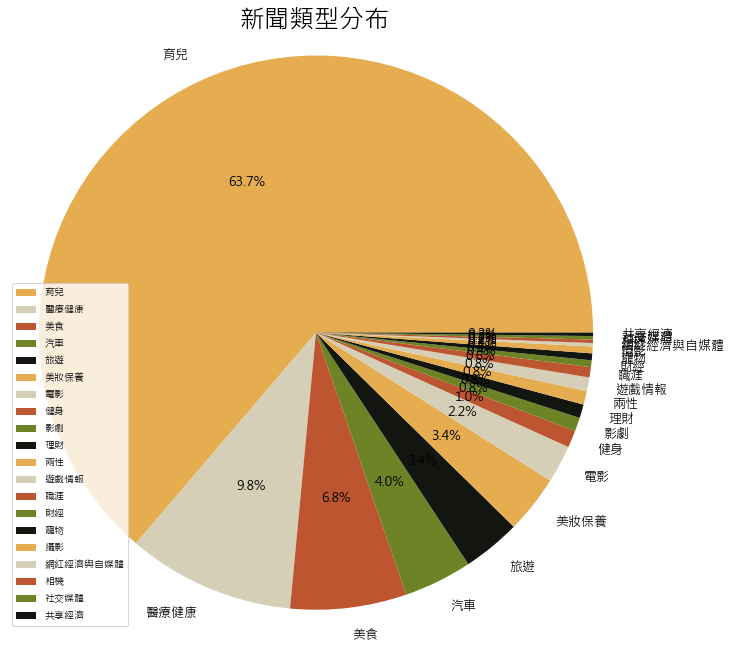

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

#修正圖的中文顯示問題
from matplotlib.font_manager import FontProperties 
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

count_category = dict(Counter(category_list))
category_count = pd.DataFrame(list(count_category.items())).sort_values(by=1, ascending = False)

plt.figure(figsize=(11,11)) # 顯示圖框架大小
plt.title('新聞類型分布', fontsize = '25')
labels = category_count[0]
size = category_count[1]
colors = ['#E5AD4F', '#D6CFB7', '#BD5630', '#6D8325', '#121510']
patches,l_text,p_text = plt.pie(size, labels = labels, colors = colors, autopct='%1.1f%%')
# 調整字體
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
plt.axis('equal')
plt.legend(labels,loc='lower left') #圖例
plt.show()

In [5]:
import jieba
jieba.set_dictionary('dict.txt.big.txt')

contents = ''
for content in content_list:
    contents += content
    
with open('stopword.txt', 'r', encoding='UTF-8') as f:
    stop_words = f.read().split('\n')
    stop_words.append('，')

jieba_content = []
for word in jieba.cut(contents):
    if word not in stop_words:
        jieba_content.append(word)
        
#sorted(Counter(jieba_content).items(), key=lambda x:x[1], reverse=True)

Building prefix dict from C:\Users\LOWEI\Desktop\dict.txt.big.txt ...
Loading model from cache C:\Users\LOWEI\AppData\Local\Temp\jieba.u6625134838a8339dc8a57d61b190281e.cache
Loading model cost 1.407 seconds.
Prefix dict has been built successfully.


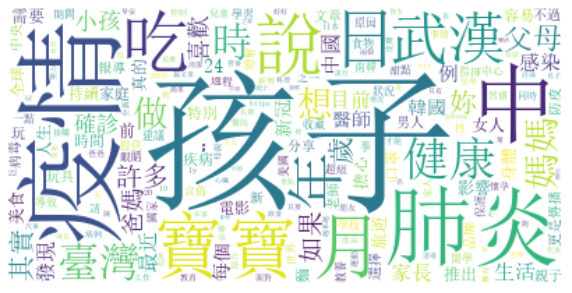

In [6]:
from wordcloud import WordCloud
from collections import Counter

wordcloud = WordCloud(
    background_color = 'white',
    font_path = "C:\\Windows\\Fonts\\simsun.ttc"
)

wordcloud.generate_from_frequencies(frequencies=Counter(jieba_content))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()